All laboratory assignments and homework will be evaluated based on three key criteria:

1. **Accuracy of Python Code**: Your Python code submissions must be precise and correct.

2. **Clarity and Organization of Jupyter Notebook**: 

- Ensure that your Jupyter notebook is well-structured and neatly organized. 
- Each Python code snippet should be supplemented with appropriate comments using either the "#" symbol or Markdown text.

3. **Effective Presentation of Outputs**: Within your Jupyter notebook, make sure all outputs are clearly visible. If necessary, provide explanations for these outputs using Markdown annotations. However, **avoid displaying entire output blocks; instead, display only the initial two to five rows for clarity**.

Additionally, all submissions must adhere to the following formatting requirements:

- Inclusion of K-State Honor Code: Each laboratory assignment and homework must contain the K-State Honor Code statement: ```"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."```

- Academic Honesty and Consequences: Breach of academic honesty can result in a grade of XF, where "F" indicates failure in the course, and "X" indicates an Honor Pledge violation. Detailed information can be found at this link: http://www.k-state.edu/provost/resources/teaching/course.htm

It's important to note the following prohibitions:

- **Unauthorized Collaboration**: Collaborating with other students on laboratory assignments, homework, the midterm exam, or the final project is strictly prohibited.

- **Unauthorized Aid**: Sharing your code with other students or receiving code from others is considered unauthorized aid and is not allowed.

- **Plagiarism**: Presenting the words of another individual (whether from the Internet or articles) as your own is considered plagiarism and is not permitted.

Adherence to these guidelines will ensure a fair and respectful learning environment and help maintain academic integrity.

Requirements

- Change the filename to yourlastname_firstinitial_HW_DataVisualization
- Include K-State Honor Code
- Use df.head(), not df

**K-State Honor Code**

> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Bhaskar Aryal

# Cheating on Spouse: Data visualization using Pandas to find out who cheated

<img src="images/cheating.jpg" width=700>

# Data understanding & preparation

In [39]:
# import packages

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print(matplotlib.__version__)    #check matplotlib version

import numpy as np

# correlation analysis
import scipy.stats  as stats
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

3.5.2


In [40]:
# read affairs.csv
df = pd.read_csv('data/affairs.csv')

#view 5 rows
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17,2,5,0.111111
1,3,27.0,13.0,3.0,1,14,3,4,3.230769
2,4,22.0,2.5,0.0,1,16,3,5,1.400000
3,4,37.0,16.5,4.0,3,16,5,5,0.727273
4,5,27.0,9.0,1.0,1,14,3,4,4.666666


In [41]:
# data types
df.dtypes

rate_marriage        int64
age                float64
yrs_married        float64
children           float64
religious            int64
educ                 int64
occupation           int64
occupation_husb      int64
affairs            float64
dtype: object

The affairs column is numerical showing the time spent on cheating spouse. How about we convert the numerical values to binary (1: cheating, 0: not cheating)

In [42]:
# convert affairs
# if affairs > 0, then affairs = 1, otherwise 0
# 1 means cheating, 0 means not cheating

df['affairs'] = np.where(df['affairs'] > 0, 1, 0)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17,2,5,1
1,3,27.0,13.0,3.0,1,14,3,4,1
2,4,22.0,2.5,0.0,1,16,3,5,1
3,4,37.0,16.5,4.0,3,16,5,5,1
4,5,27.0,9.0,1.0,1,14,3,4,1


In [43]:
# check data types agaom
df.dtypes

rate_marriage        int64
age                float64
yrs_married        float64
children           float64
religious            int64
educ                 int64
occupation           int64
occupation_husb      int64
affairs              int32
dtype: object

In [44]:
# find out how many unique values in the affairs column
df['affairs'].nunique()

2

In [45]:
# how many cheated (based on the binary column "affairs"). Proportion of cheating vs. not cheating

df['affairs'].value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [46]:
# check missing values
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [47]:
# summary descriptive statistics
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


The column affairs tells us how long someone cheated (measure of time spent in extramarital affairs). How about we create a new column showing Yes or No on cheating?

In [48]:
# view column names
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [49]:
# find out the number of unique values in each column
for col in df.columns:
    print(col, df[col].nunique())

rate_marriage 5
age 6
yrs_married 7
children 6
religious 4
educ 6
occupation 6
occupation_husb 6
affairs 2


Based on the results above, we can assume that

* **categorical variables** are ```affairs```, ```occupation``` and ```occumpation_husb```
* **numerical variables** are the rest of the variables (in fact, this dataset is somewhat unique that other variables such as ```religous``` and ```rate_marriage``` could be considered **categorical since each column has only a few unique values**). **Always, context matters!**

# Exploratory data analysis (EDA)

> **Distribution of data**: hist, kde

> **Composition of data**: box, bar, pie

> **Relationships of data**: scatter, line

## Categorical variables: Composition of data

- Pie
- Bar
- ...

### Occupation

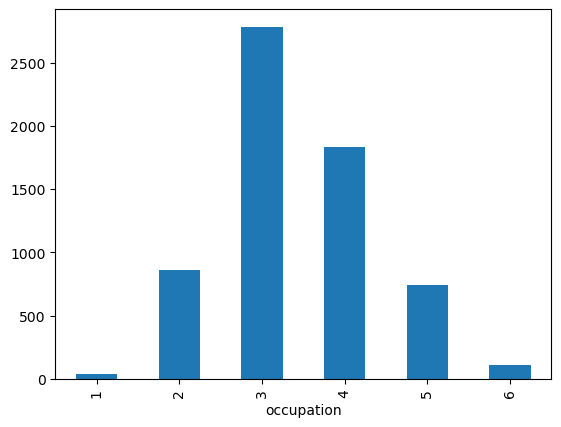

In [50]:
df.groupby('occupation').size().plot(kind='bar');

In [51]:
g= df.groupby('occupation').size()
g

occupation
1      41
2     859
3    2783
4    1834
5     740
6     109
dtype: int64

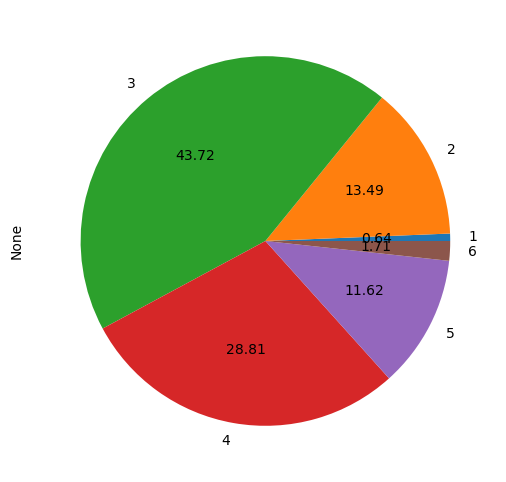

In [52]:
g.plot(kind='pie', autopct='%.2f', fontsize=10, figsize=(6, 6));

### occupation_husb

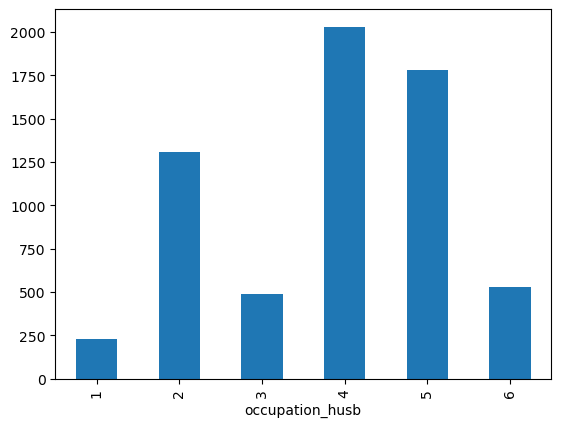

In [53]:
# How many people in each occupation_husb? Pie chart
g = df.groupby('occupation_husb').size()
g.plot(kind='bar');

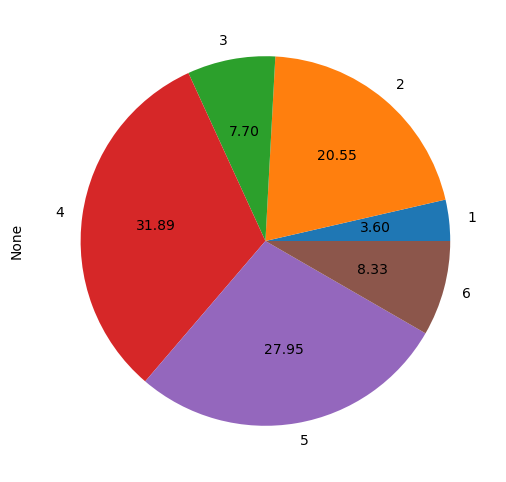

In [54]:
# How many people in each occupation_husb? Bar chart
g.plot(kind='pie', autopct='%.2f', fontsize=10, figsize=(6, 6));

### affairs

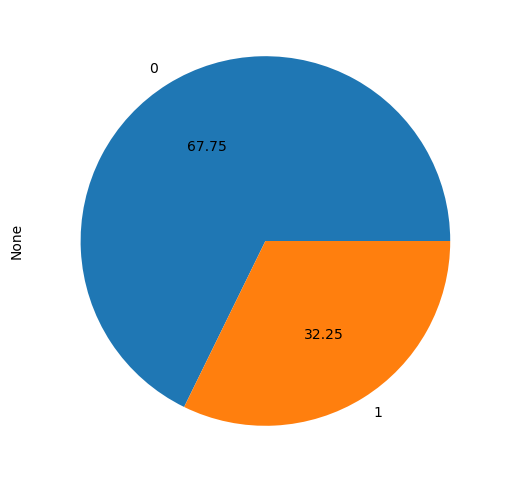

In [55]:
# How many cheated? How many not? Pie chart
g= df.groupby('affairs').size()
g.plot(kind='pie', autopct='%.2f', fontsize=10, figsize=(6, 6));

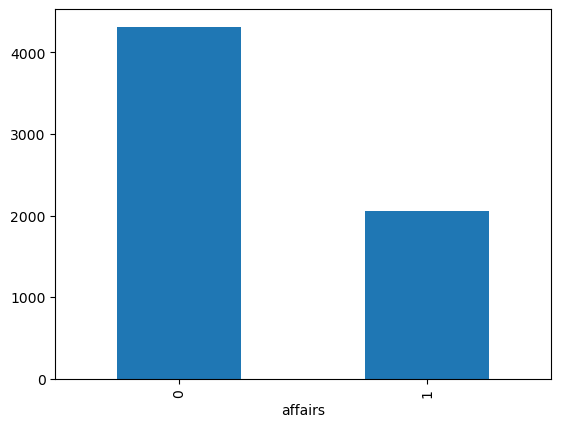

In [56]:
# How many cheated? How many not? Bar chart
g.plot(kind = 'bar');

## Numerical variables: Distribution & Relationships of data

You would be interested in **distribution**

- Histogram
- Boxplot
- ...

**Two numerical variables**: You would be interested in **relationship**

- Scatterplot
- Lineplot

### Distribution of yrs_married

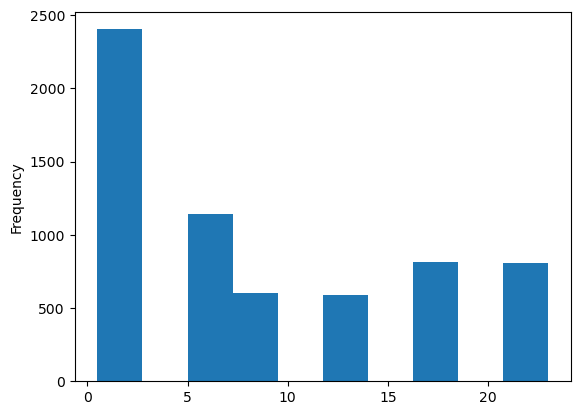

In [57]:
# yearsmarried distribution using histogram
df['yrs_married'].plot(kind='hist');

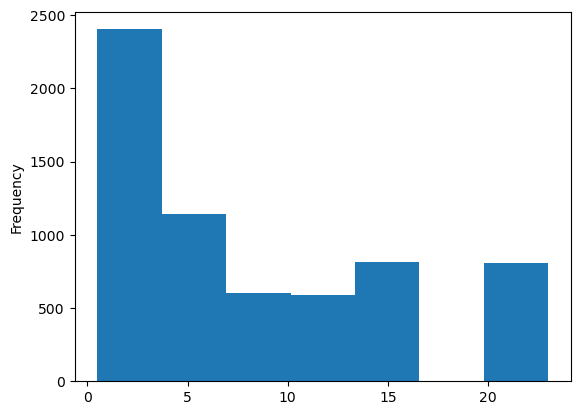

In [58]:
# yearsmarried distribution using histogram ... this looks better.
df['yrs_married'].plot(kind='hist', bins=7);   # 7 unique values in yrs_married

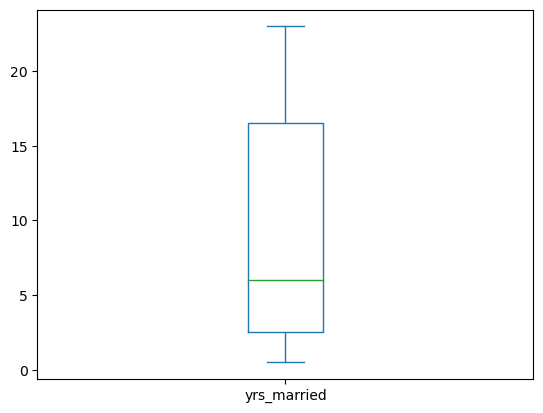

In [59]:
# Age distribution using boxplot
df['yrs_married'].plot.box();

### rate_marriage

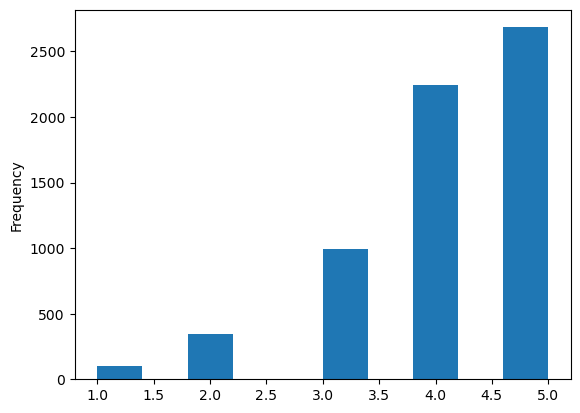

In [60]:
# rate_marriage distribution using histogram
df['rate_marriage'].plot(kind='hist');

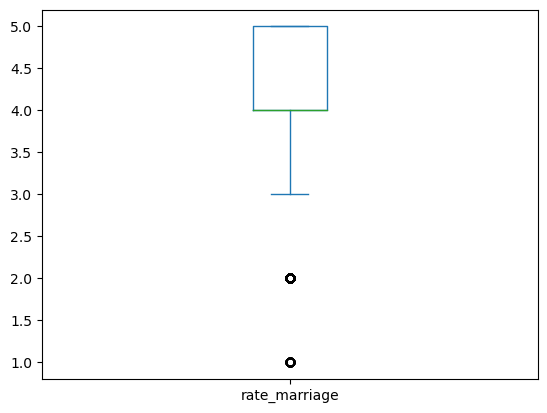

In [61]:
# rate_marriage distribution using boxplot
df['rate_marriage'].plot.box();

### educ

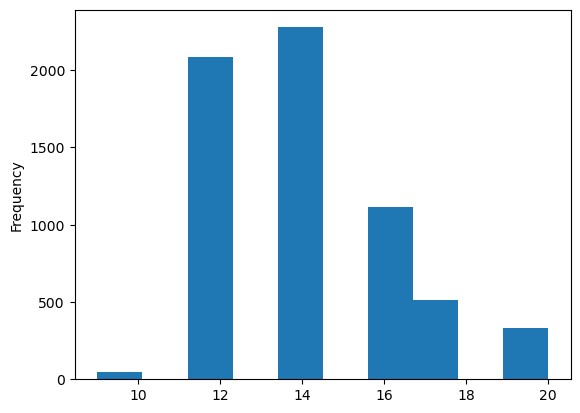

In [62]:
# educ distribution using histogram
df['educ'].plot(kind='hist');

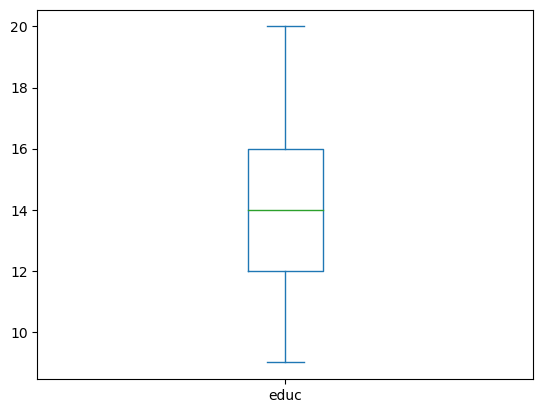

In [63]:
# educ distribution using boxplot
df['educ'].plot.box();

# Data visualization for business intelligence & statistical analysis

The goal is to answer who is likely to cheat, so the focus is on discovering the relationships between **affairs** and other variables

## Affairs & Categorical X variables

**Composition**

* Use ```affairs``` columnn as y value and explore the relationships between X variables and y value

### Plot affair rate by occupation

In [64]:
# for visualization, this dataframe format works better
g = df.groupby(['occupation','affairs']).size().unstack()
g

affairs,0,1
occupation,,
1,34,7
2,607,252
3,1818,965
4,1354,480
5,431,309
6,69,40


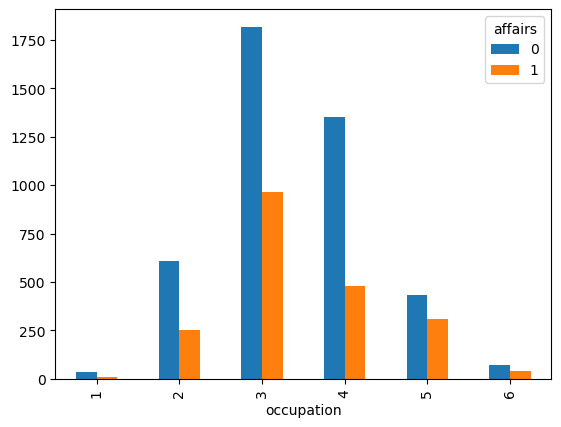

In [65]:
g.plot(kind='bar');

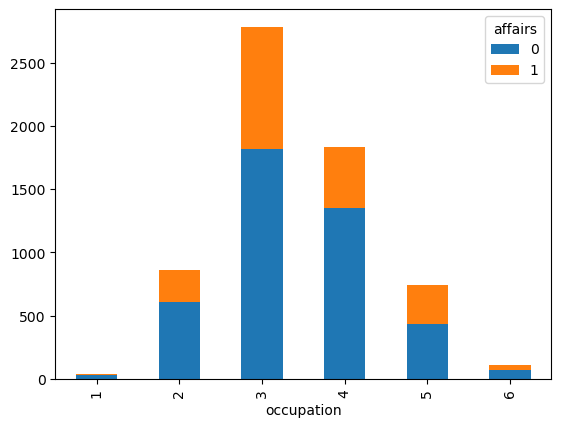

In [66]:
g.plot(kind='bar', stacked=True);

The above count-based approach is not much insightful. 
Let's try the percentage-based approach below.

In [67]:
g = g.div(g.sum(axis=1), axis=0)
g

affairs,0,1
occupation,,
1,0.829268,0.170732
2,0.706636,0.293364
3,0.653252,0.346748
4,0.738277,0.261723
5,0.582432,0.417568
6,0.633028,0.366972


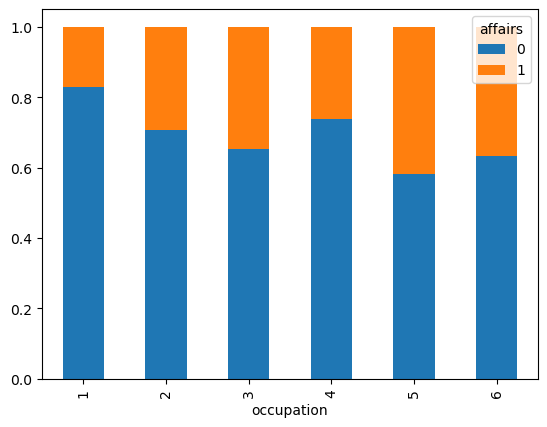

In [68]:
g.plot(kind='bar', stacked=True);

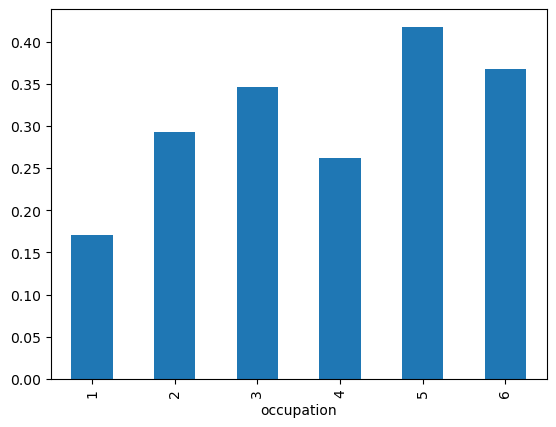

In [69]:
# affair rate
g[1].plot(kind='bar');

In [70]:
# Transpose the pivot table for pie plot
g.T

occupation,1,2,3,4,5,6
affairs,,,,,,
0,0.829268,0.706636,0.653252,0.738277,0.582432,0.633028
1,0.170732,0.293364,0.346748,0.261723,0.417568,0.366972


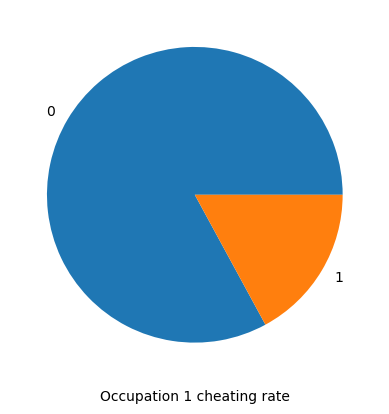

In [71]:
# Cheating rate of the people in Occupation #1

g.T[1].plot(kind='pie')

plt.xlabel("Occupation 1 cheating rate")
plt.ylabel("");

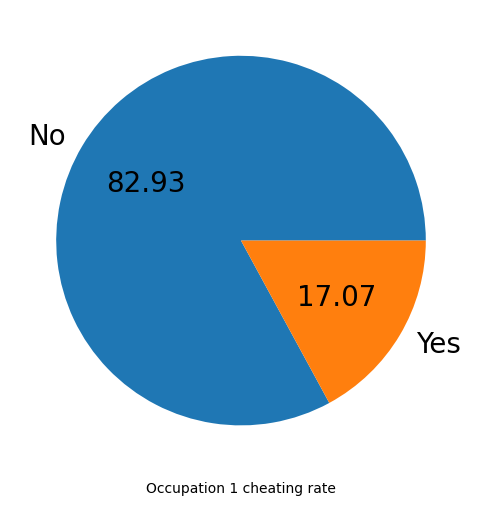

In [72]:
g.T[1].plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=20, figsize=(6, 6))

plt.xlabel("Occupation 1 cheating rate")
plt.ylabel("");

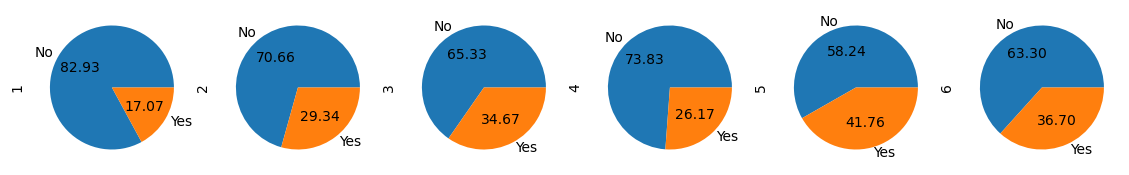

In [73]:
g.T.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(14, 12), legend=False, subplots=True);

**Summarize the above results**

* Managerial, administrative, business professionals appear to be more likely to cheat ... 
* Professionals with advanced degree appear to be more likely to cheat ... 

### Plot affairs rate by occupation_husb

In [74]:
# for visualization, husband's occupation vs affairs 
g = df.groupby(['occupation_husb','affairs']).size().unstack()
g

affairs,0,1
occupation_husb,,
1,181,48
2,882,426
3,317,173
4,1391,639
5,1177,602
6,365,165


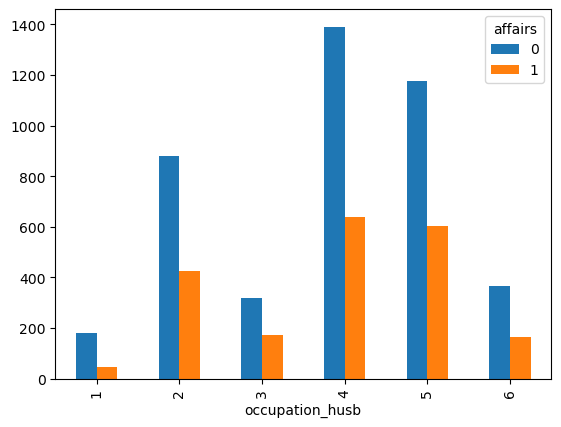

In [75]:
g.plot(kind='bar');

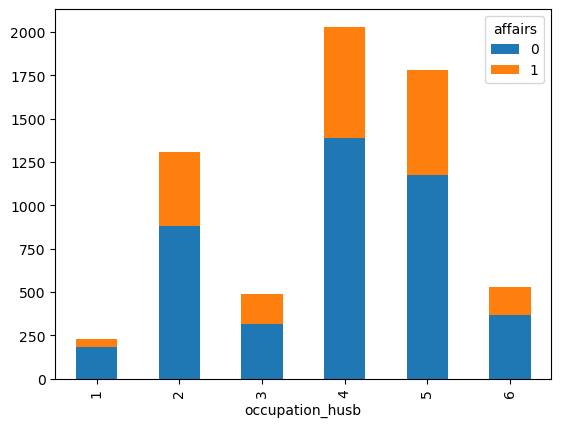

In [76]:
g.plot(kind='bar', stacked=True);

In [78]:
g = g.div(g.sum(axis=1), axis=0)
g

affairs,0,1
occupation_husb,,
1,0.790393,0.209607
2,0.674312,0.325688
3,0.646939,0.353061
4,0.685222,0.314778
5,0.661608,0.338392
6,0.688679,0.311321


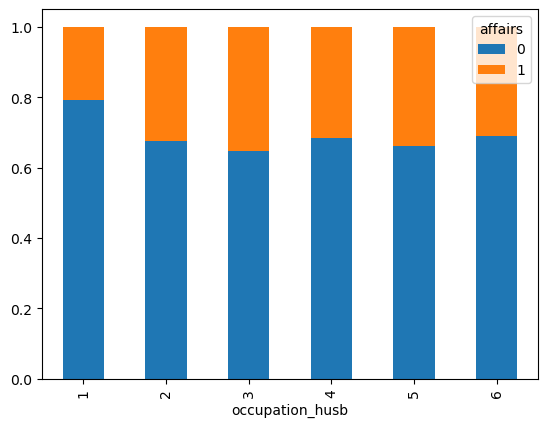

In [79]:
g.plot(kind='bar', stacked=True);

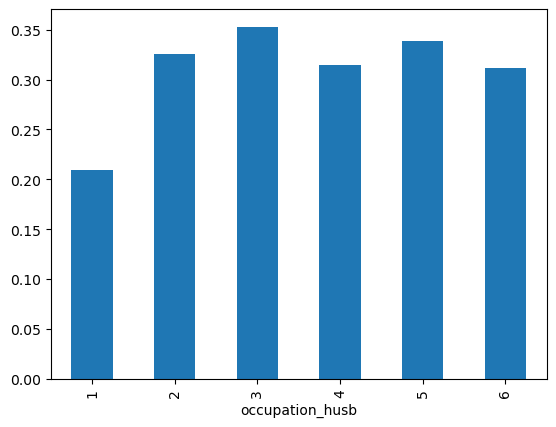

In [80]:
# affair rate
g[1].plot(kind='bar');

In [81]:
# Transpose the pivot table for pie plot
g.T

occupation_husb,1,2,3,4,5,6
affairs,,,,,,
0,0.790393,0.674312,0.646939,0.685222,0.661608,0.688679
1,0.209607,0.325688,0.353061,0.314778,0.338392,0.311321


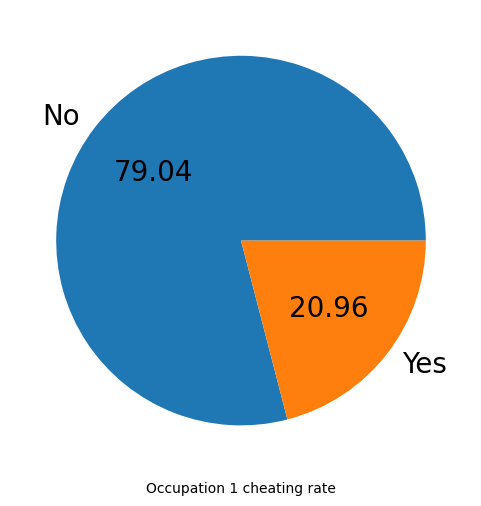

In [88]:
# Cheating rate of the people in Occupation #1

g.T[1].plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=20, figsize=(6, 6))

plt.xlabel("Occupation 1 cheating rate")
plt.ylabel("");

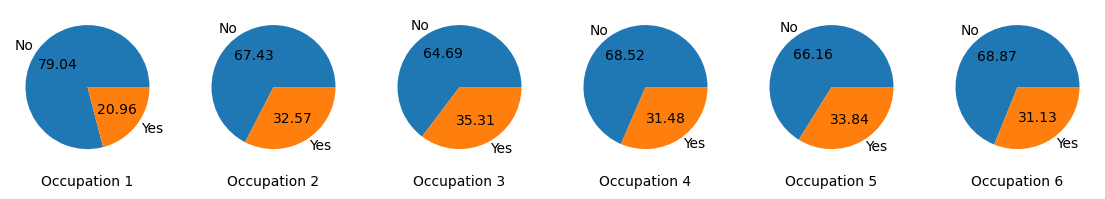

In [89]:
axes = g.T.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(14, 12), legend=False, subplots=True)

axes[0].set_xlabel('Occupation 1')
axes[0].set_ylabel('')
axes[1].set_xlabel('Occupation 2')
axes[1].set_ylabel('')
axes[2].set_xlabel('Occupation 3')
axes[2].set_ylabel('')
axes[3].set_xlabel('Occupation 4')
axes[3].set_ylabel('')
axes[4].set_xlabel('Occupation 5')
axes[4].set_ylabel('');
axes[5].set_xlabel('Occupation 6')
axes[5].set_ylabel('');

**Summarize the above results**

* Cheating rate was lowest for couples whose hubsbands were engaged in Husband Occupation 1 
* Cheating rate is highest for Husband Occupation 3 and lowest for Husband Occupation 1

### Plot affairs rate by religious

In [91]:
# for visualization, husband's occupation vs affairs 
g = df.groupby(['religious','affairs']).size().unstack()
g

affairs,0,1
religious,,
1,613,408
2,1448,819
3,1715,707
4,537,119


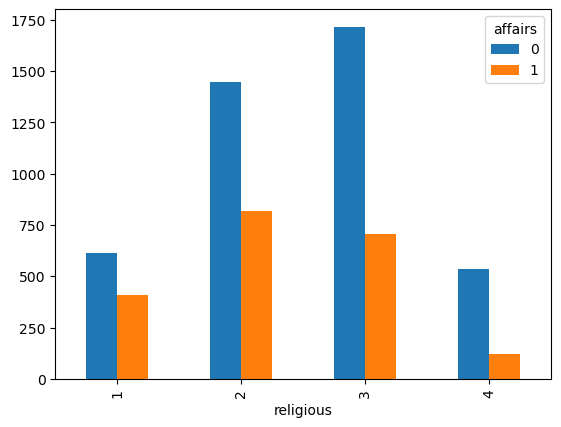

In [92]:
g.plot(kind='bar');

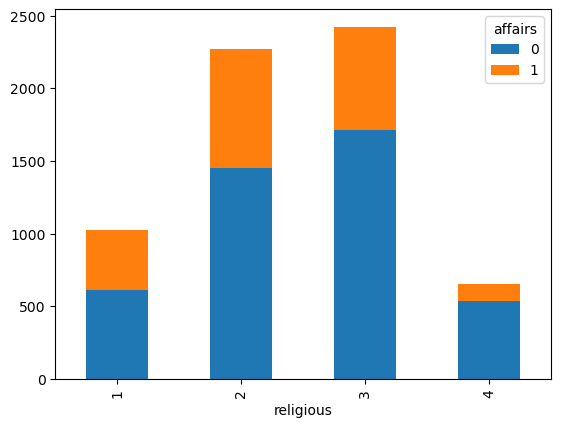

In [93]:
g.plot(kind='bar', stacked=True);

In [95]:
g = g.div(g.sum(axis=1), axis=0)
g

affairs,0,1
religious,,
1,0.600392,0.399608
2,0.638730,0.361270
3,0.708092,0.291908
4,0.818598,0.181402


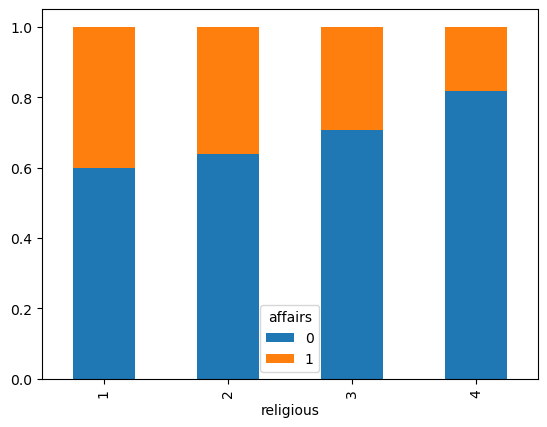

In [96]:
g.plot(kind='bar', stacked=True);

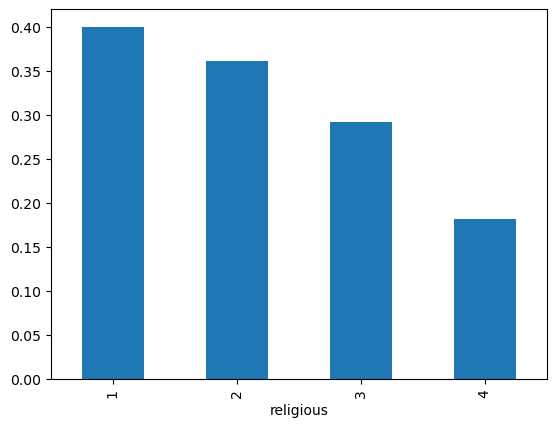

In [97]:
# affair rate
g[1].plot(kind='bar');

In [98]:
# Transpose the pivot table for pie plot
g.T

religious,1,2,3,4
affairs,,,,
0,0.600392,0.63873,0.708092,0.818598
1,0.399608,0.36127,0.291908,0.181402


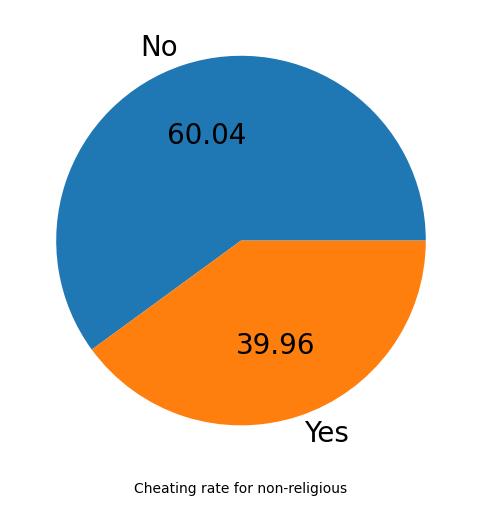

In [100]:
# Cheating rate of the people in least religious people

g.T[1].plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=20, figsize=(6, 6))

plt.xlabel("Cheating rate for non-religious")
plt.ylabel("");

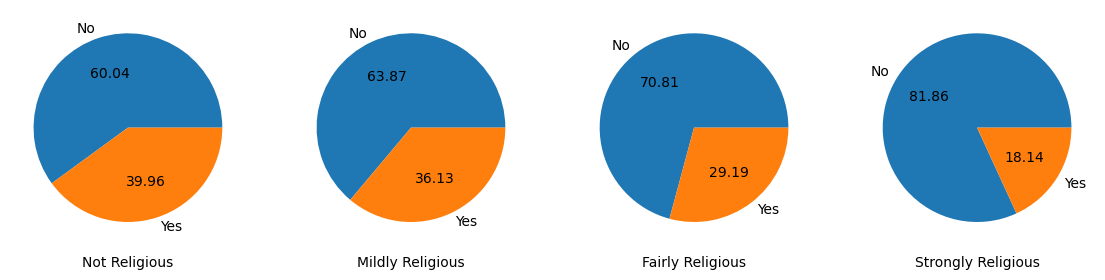

In [101]:
axes = g.T.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(14, 12), legend=False, subplots=True)

axes[0].set_xlabel('Not Religious')
axes[0].set_ylabel('')
axes[1].set_xlabel('Mildly Religious')
axes[1].set_ylabel('')
axes[2].set_xlabel('Fairly Religious')
axes[2].set_ylabel('')
axes[3].set_xlabel('Strongly Religious')
axes[3].set_ylabel('');

**Summarize the above results**

* The more religious a person is, the lesser the affair rate. Religious belief has a negative association with affair rate
* 40 % of non-religious people cheated their partner, whereas 18 % of strongly religious people cheated their partner

## Affairs & Numerical X variables

**Distribution** --> **Relationships**

### distributions of yrs_marriaged who cheated

**Distribution** --> **Relationships between yrs_married and affairs**

In [102]:
c = df[df['affairs'] == 1]  # those cheated     
nc = df[df['affairs'] == 0]  # those NOT cheated
print(len(c), len(nc))

2053 4313


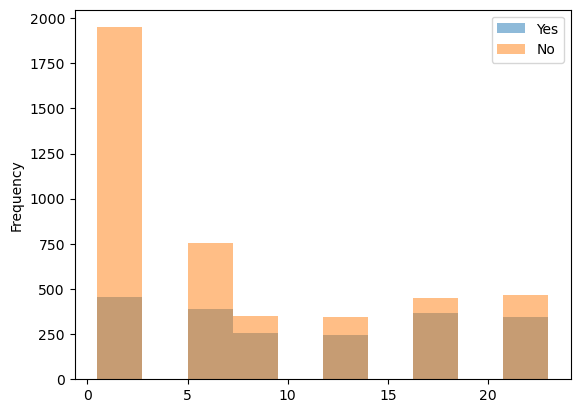

In [103]:
c['yrs_married'].plot(kind='hist', alpha=0.5)
nc['yrs_married'].plot(kind='hist', alpha=0.5)
plt.legend(['Yes','No']);

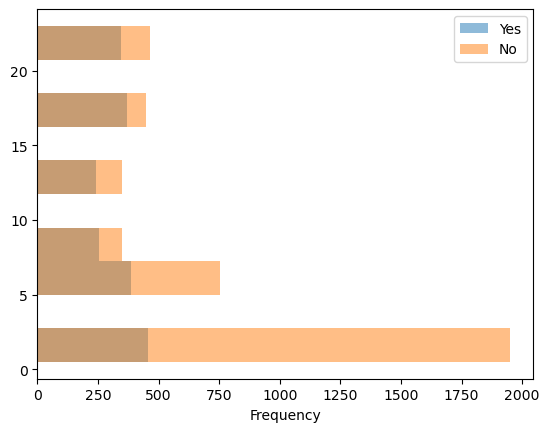

In [104]:
c['yrs_married'].plot(kind='hist', alpha=0.5, orientation='horizontal')
nc['yrs_married'].plot(kind='hist', alpha=0.5, orientation='horizontal')
plt.legend(['Yes','No']);

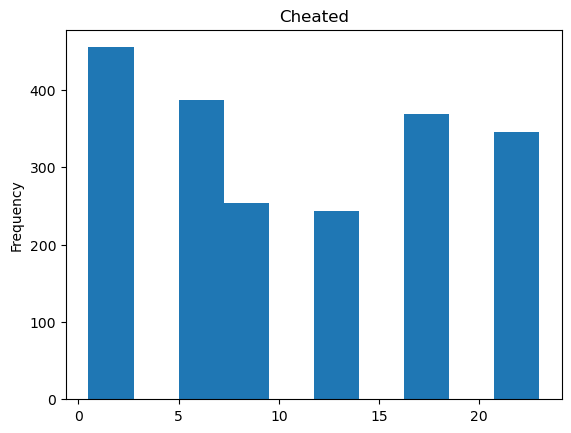

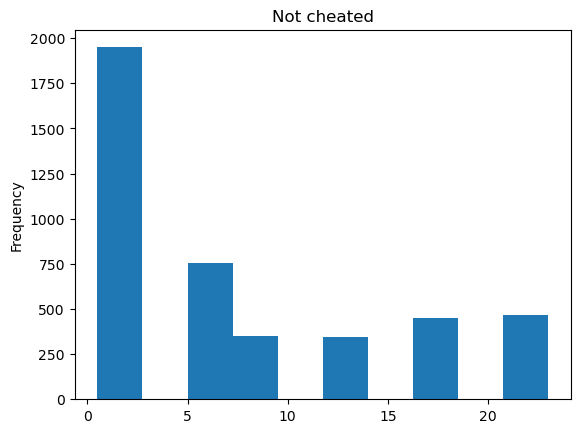

In [105]:
plt.figure()
c['yrs_married'].plot(kind='hist')
plt.title('Cheated')

plt.figure()
nc['yrs_married'].plot(kind='hist')
plt.title('Not cheated');

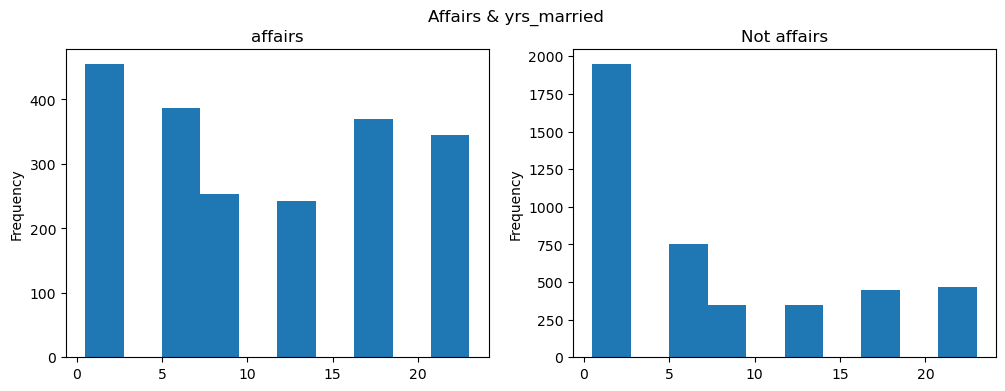

In [106]:
# customized approach using matplotlib

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('Affairs & yrs_married')

c['yrs_married'].plot(kind='hist', ax=ax1)
ax1.set_title('affairs')

nc['yrs_married'].plot(kind='hist', ax=ax2)
ax2.set_title('Not affairs');

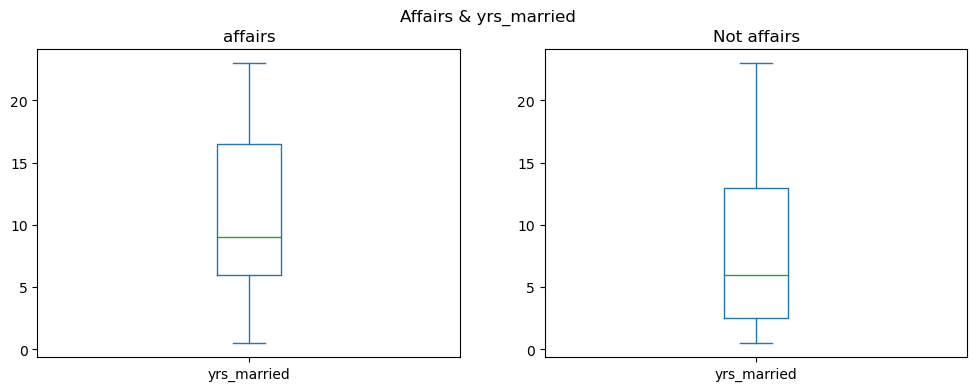

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('Affairs & yrs_married')

c['yrs_married'].plot(kind='box', ax=ax1)
ax1.set_title('affairs')

nc['yrs_married'].plot(kind='box', ax=ax2)
ax2.set_title('Not affairs');

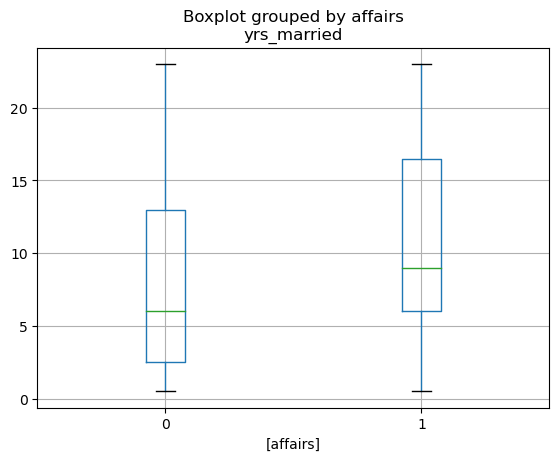

In [108]:
df.boxplot(column=['yrs_married'], by=['affairs']);

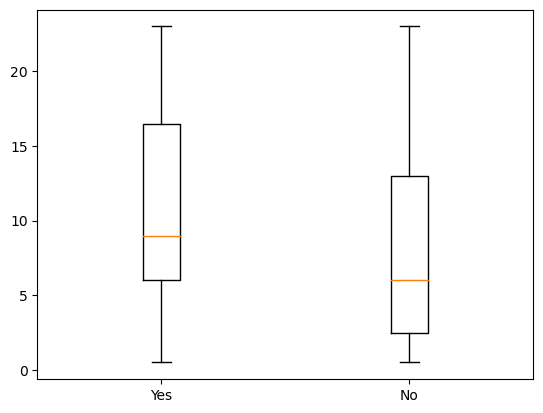

In [109]:
data_to_plot = [ c['yrs_married'], nc['yrs_married'] ] 
plt.boxplot(data_to_plot)
plt.xticks([1,2], ['Yes','No']);

**Summarize the above results**

* People married for less than five years appear more faithful to their partners than those married for five or more years
* The median age for couples who had affairs was about 9 years 


### distributions of # of children who cheated or no 
**Distribution** --> **Relationship between children and affairs**

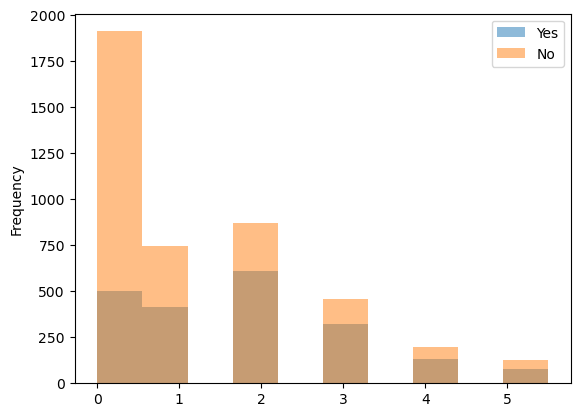

In [115]:
c['children'].plot(kind='hist', alpha=0.5)
nc['children'].plot(kind='hist', alpha=0.5)
plt.legend(['Yes','No']);

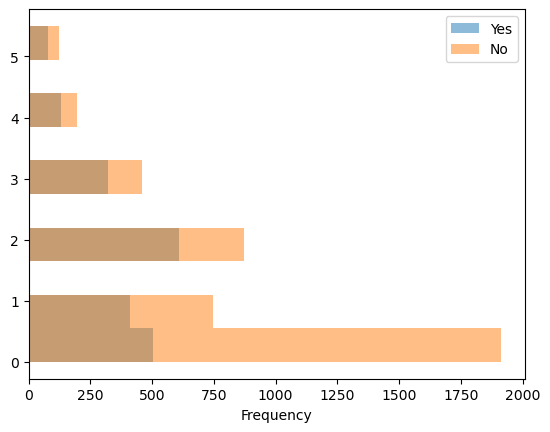

In [116]:
c['children'].plot(kind='hist', alpha=0.5, orientation = 'horizontal')
nc['children'].plot(kind='hist', alpha=0.5,  orientation = 'horizontal')
plt.legend(['Yes','No']);

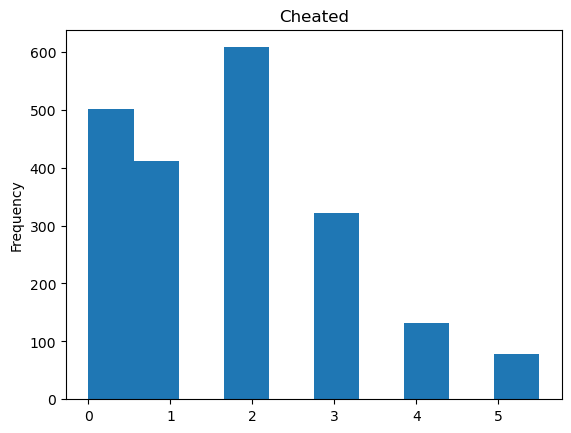

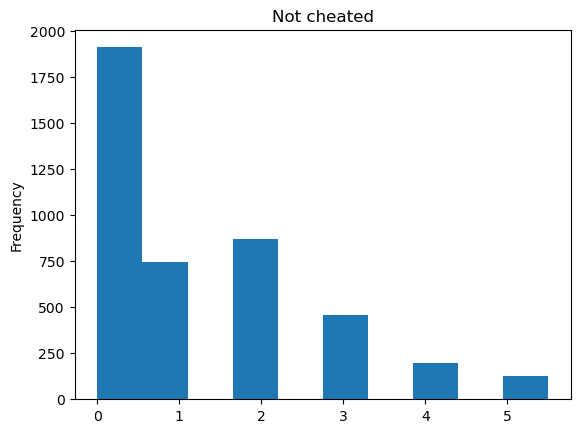

In [117]:
plt.figure()
c['children'].plot(kind='hist')
plt.title('Cheated')

plt.figure()
nc['children'].plot(kind='hist')
plt.title('Not cheated');

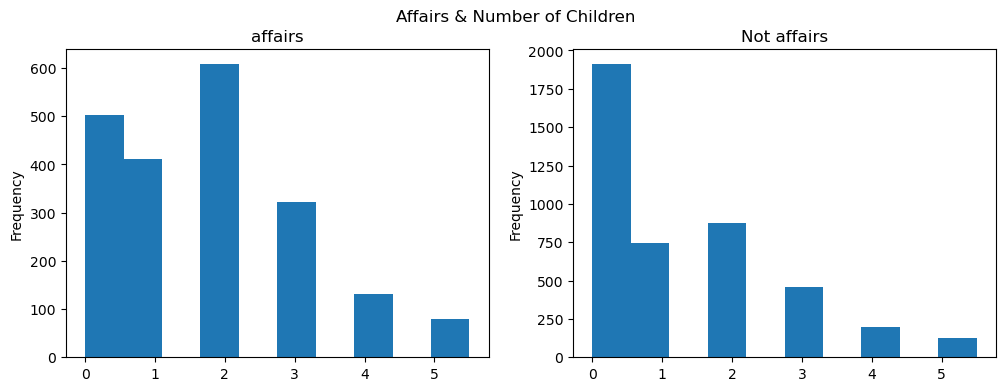

In [118]:
# customized approach using matplotlib

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('Affairs & Number of Children')

c['children'].plot(kind='hist', ax=ax1)
ax1.set_title('affairs')

nc['children'].plot(kind='hist', ax=ax2)
ax2.set_title('Not affairs');

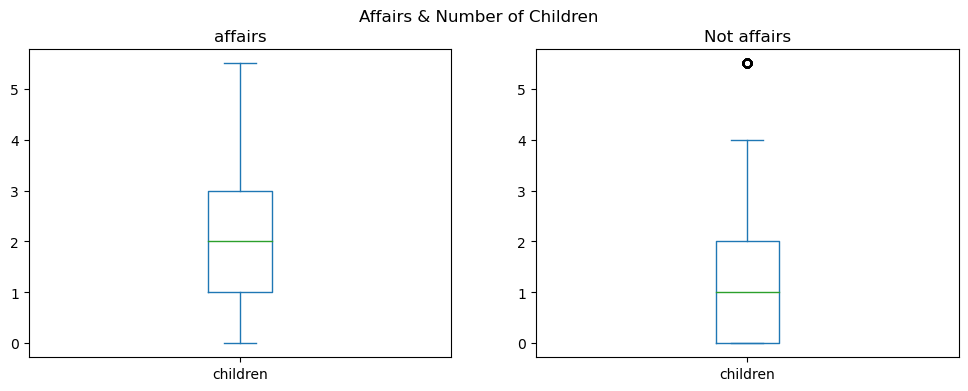

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('Affairs & Number of Children')

c['children'].plot(kind='box', ax=ax1)
ax1.set_title('affairs')

nc['children'].plot(kind='box', ax=ax2)
ax2.set_title('Not affairs');

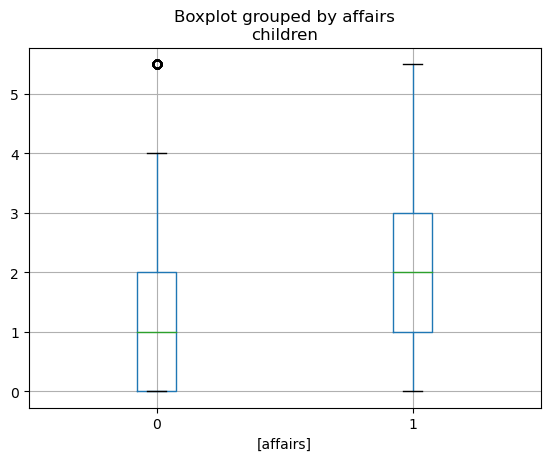

In [120]:
df.boxplot(column=['children'], by=['affairs']);

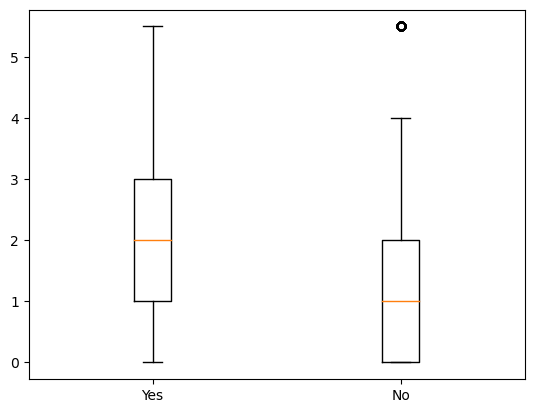

In [121]:
data_to_plot = [ c['children'], nc['children'] ] 
plt.boxplot(data_to_plot)
plt.xticks([1,2], ['Yes','No']);

**Summarize the above results**

* People with higher number of children tend to cheat less 
* The median number of children for couples who cheated is 2, whereas for people who did not cheat, the median age is 1.


### distributions of age who cheated or no 
**Distribution** --> **Relationship between age and affairs**

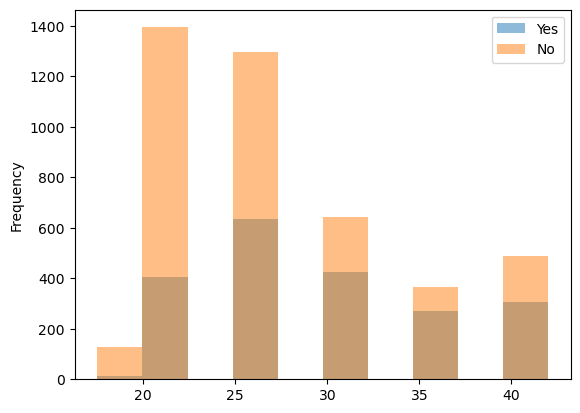

In [123]:
c['age'].plot(kind='hist', alpha=0.5)
nc['age'].plot(kind='hist', alpha=0.5)
plt.legend(['Yes','No']);

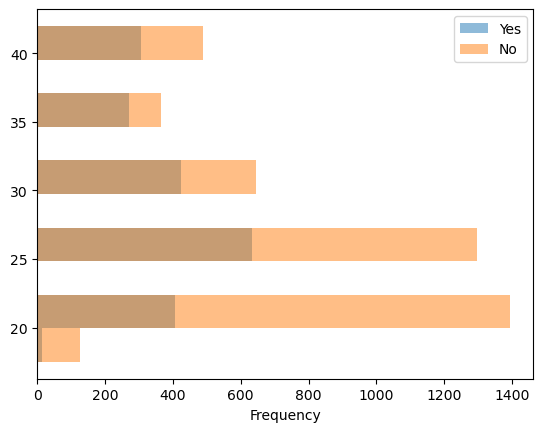

In [125]:
c['age'].plot(kind='hist', alpha=0.5, orientation = 'horizontal')
nc['age'].plot(kind='hist', alpha=0.5, orientation = 'horizontal')
plt.legend(['Yes','No']);

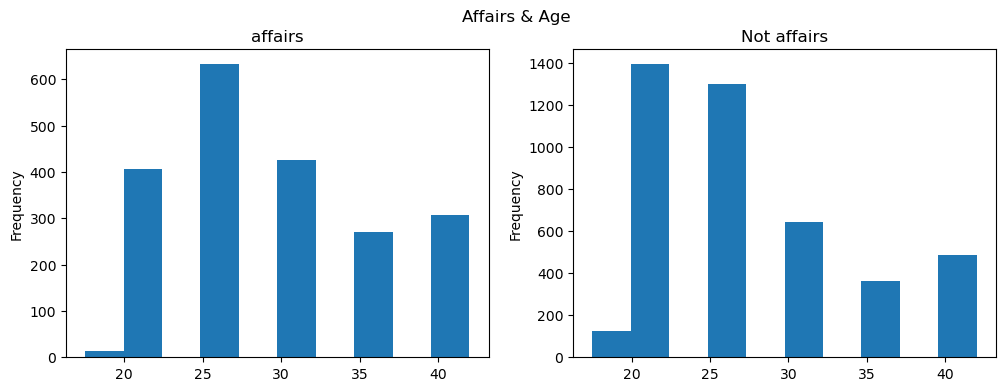

In [129]:
# customized approach using matplotlib

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('Affairs & Age')

c['age'].plot(kind='hist', ax=ax1)
ax1.set_title('affairs')

nc['age'].plot(kind='hist', ax=ax2)
ax2.set_title('Not affairs');

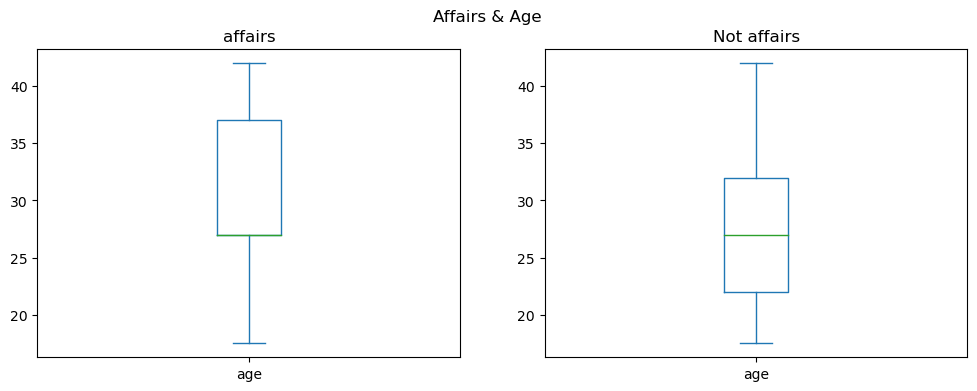

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

fig.suptitle('Affairs & Age')

c['age'].plot(kind='box', ax=ax1)
ax1.set_title('affairs')

nc['age'].plot(kind='box', ax=ax2)
ax2.set_title('Not affairs');

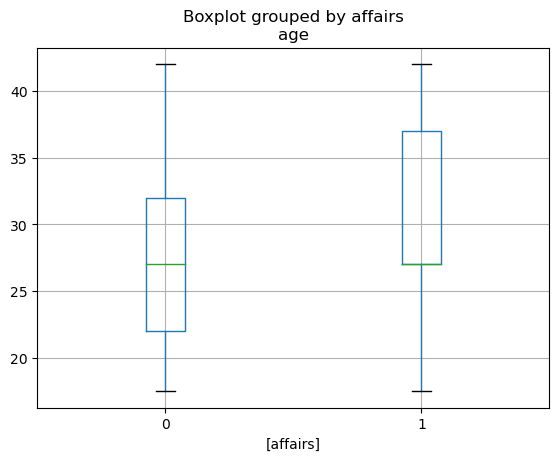

In [132]:
df.boxplot(column=['age'], by=['affairs']);

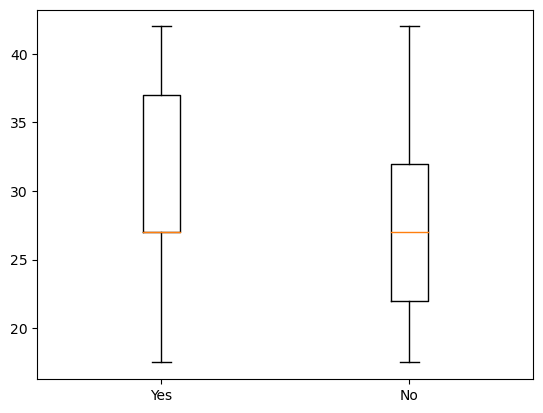

In [133]:
data_to_plot = [ c['age'], nc['age'] ] 
plt.boxplot(data_to_plot)
plt.xticks([1,2], ['Yes','No']);

**Summarize the above results**

* Couples in their mid-twenties tend to cheat more 
* Couples in their mid-thirties tend to chead less 


## Affairs by multiple variables at once

### religious, rate_marriage, affairs

**Let's examine how these three variables are related**

In [134]:
g = df.groupby(['religious', 'rate_marriage', 'affairs']).size().unstack()
g

affairs                    0    1
religious rate_marriage          
1         1                6   12
          2               16   40
          3               68  110
          4              216  130
          5              307  116
2         1                8   28
          2               46  100
          3              179  222
          4              527  308
          5              688  161
3         1                9   29
          2               50   71
          3              160  184
          4              631  246
          5              865  177
4         1                2    5
          2               15   10
          3               39   31
          4              144   40
          5              337   33

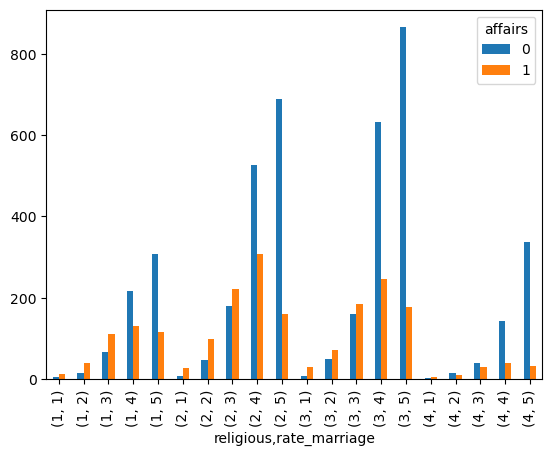

In [135]:
g.plot(kind='bar');  # not looking great even though it tells a good story

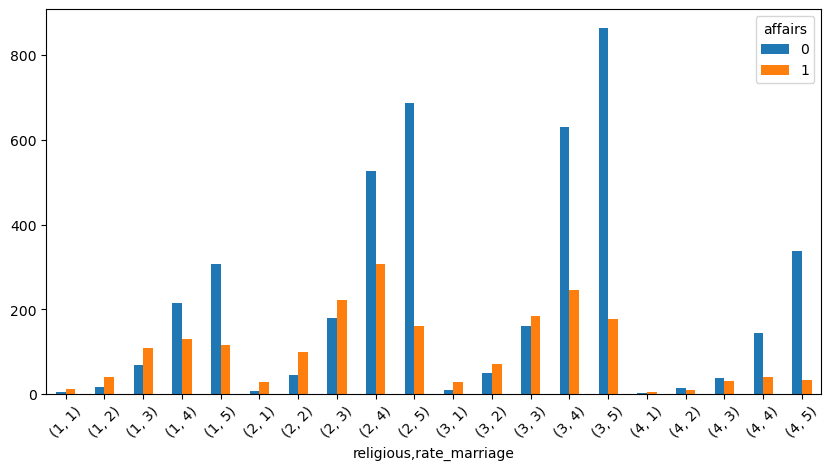

In [136]:
ax = g.plot(kind='bar', rot=45, figsize=(10,5));

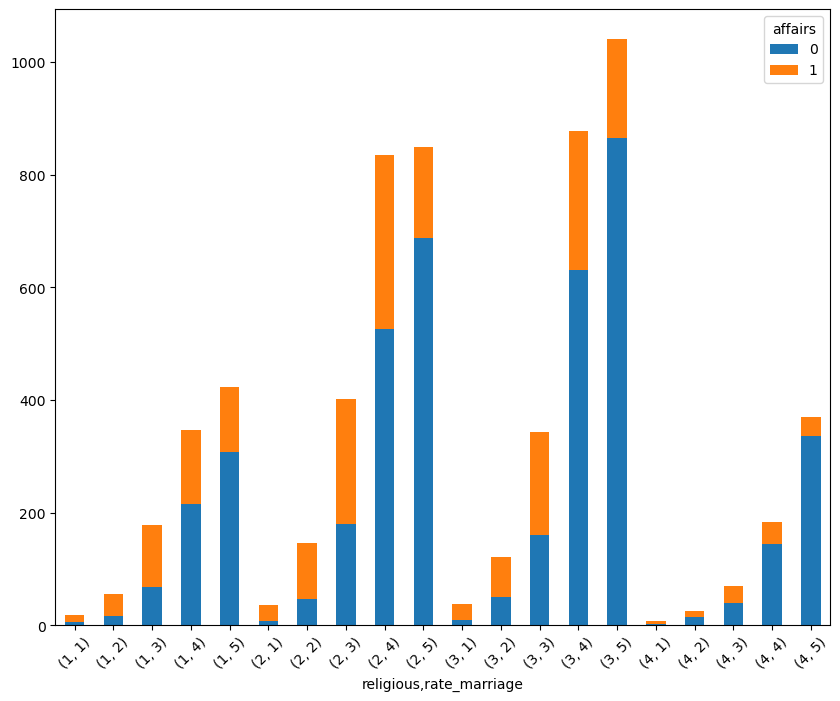

In [137]:
g.plot(kind='bar', stacked=True, rot=45, figsize=(10,8));

Let's try the percentage-based approach below.

In [138]:
g = g.div(g.sum(axis=1), axis=0)
g

affairs                         0         1
religious rate_marriage                    
1         1              0.333333  0.666667
          2              0.285714  0.714286
          3              0.382022  0.617978
          4              0.624277  0.375723
          5              0.725768  0.274232
2         1              0.222222  0.777778
          2              0.315068  0.684932
          3              0.446384  0.553616
          4              0.631138  0.368862
          5              0.810365  0.189635
3         1              0.236842  0.763158
          2              0.413223  0.586777
          3              0.465116  0.534884
          4              0.719498  0.280502
          5              0.830134  0.169866
4         1              0.285714  0.714286
          2              0.600000  0.400000
          3              0.557143  0.442857
          4              0.782609  0.217391
          5              0.910811  0.089189

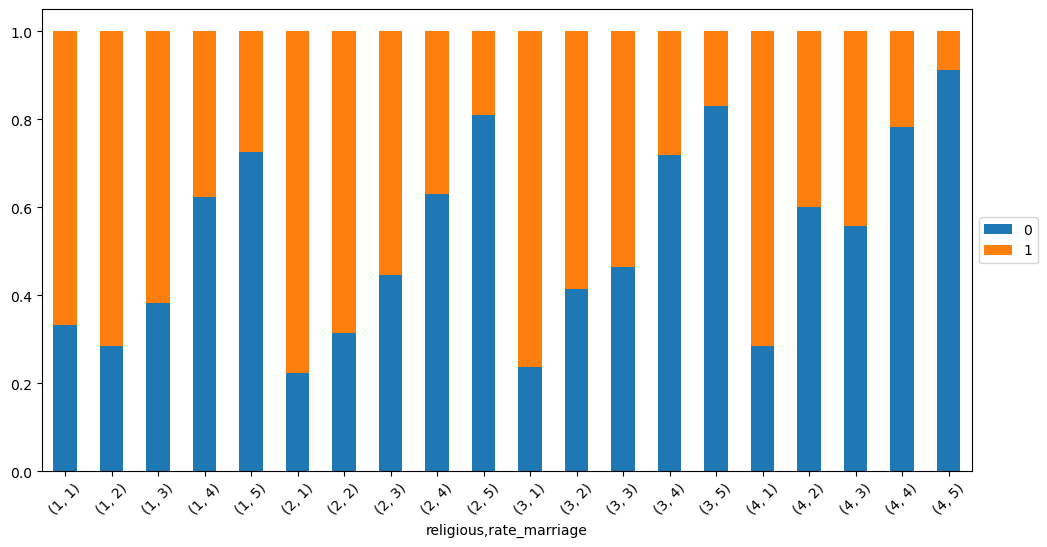

In [139]:
g.plot.bar(stacked=True, rot=45, figsize=(12,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

**Summarize the above results**

* unhappy marriage (e.g., 1, 2) & less religious (e.g., 1, 2) --> high cheating !!!
* happy in marriage & more religious --> less cheating

### yrs_married, age, affairs 

In [140]:
g = df.groupby(['yrs_married', 'age', 'affairs']).size().unstack()
g

affairs                0      1
yrs_married age                
0.5         17.5    64.0    2.0
            22.0   231.0   10.0
            27.0    54.0    3.0
            32.0     3.0    1.0
            37.0     2.0    NaN
2.5         17.5    62.0   11.0
            22.0  1014.0  298.0
            27.0   460.0  117.0
            32.0    51.0   11.0
            37.0     7.0    1.0
            42.0     1.0    1.0
6.0         22.0   143.0   97.0
            27.0   524.0  277.0
            32.0    79.0   11.0
            37.0     6.0    2.0
            42.0     2.0    NaN
9.0         22.0     6.0    1.0
            27.0   198.0  181.0
            32.0   124.0   68.0
            37.0    15.0    3.0
            42.0     5.0    1.0
13.0        27.0    46.0   45.0
            32.0   218.0  154.0
            37.0    60.0   31.0
            42.0    23.0   13.0
16.5        27.0    16.0   10.0
            32.0   164.0  176.0
            37.0   215.0  150.0
            42.0    54.0   33.0
23.0        32.0     5.0    4.0
            37.0    59.0   83.0
            42.0   402.0  258.0

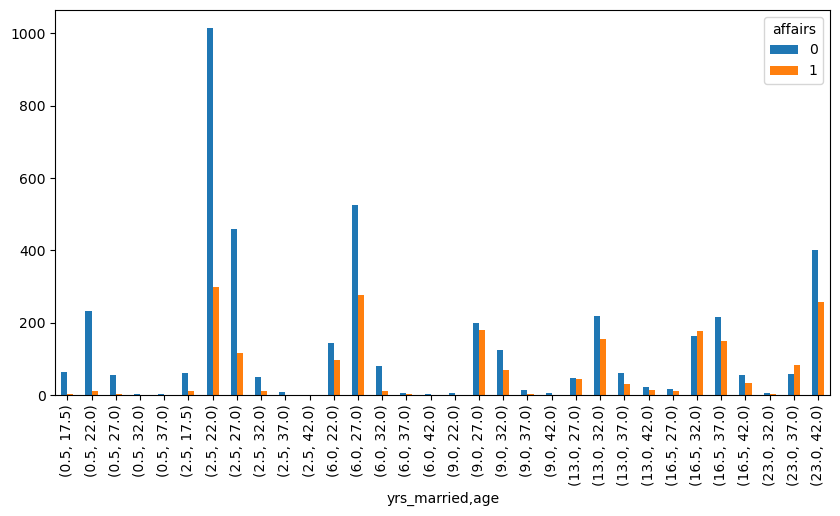

In [142]:
ax = g.plot(kind='bar', rot=90, figsize=(10,5));

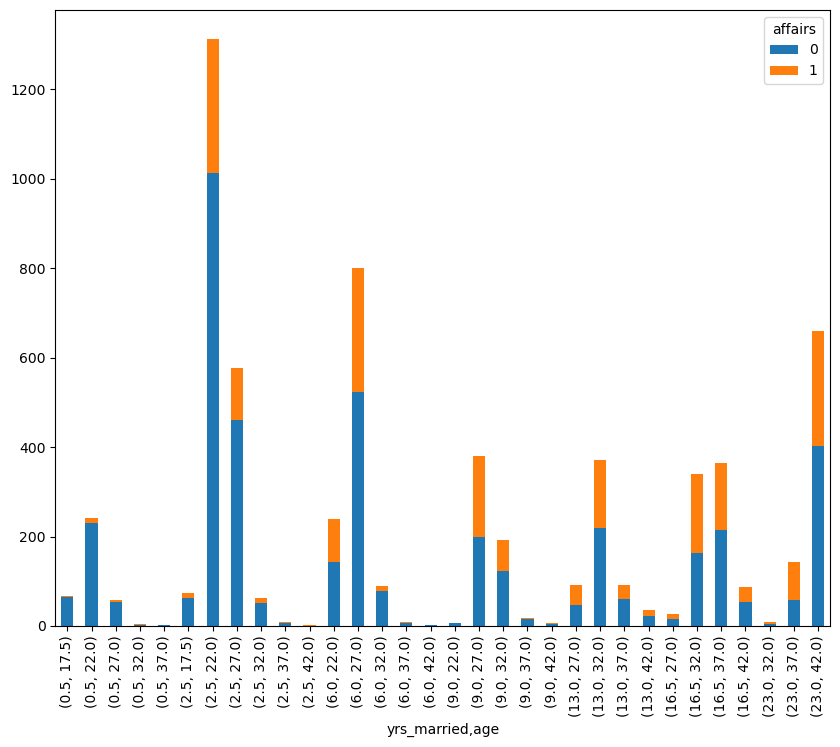

In [143]:
g.plot(kind='bar', stacked=True, rot=90, figsize=(10,8));

In [144]:
g = g.div(g.sum(axis=1), axis=0)
g

affairs                  0         1
yrs_married age                     
0.5         17.5  0.969697  0.030303
            22.0  0.958506  0.041494
            27.0  0.947368  0.052632
            32.0  0.750000  0.250000
            37.0  1.000000       NaN
2.5         17.5  0.849315  0.150685
            22.0  0.772866  0.227134
            27.0  0.797227  0.202773
            32.0  0.822581  0.177419
            37.0  0.875000  0.125000
            42.0  0.500000  0.500000
6.0         22.0  0.595833  0.404167
            27.0  0.654182  0.345818
            32.0  0.877778  0.122222
            37.0  0.750000  0.250000
            42.0  1.000000       NaN
9.0         22.0  0.857143  0.142857
            27.0  0.522427  0.477573
            32.0  0.645833  0.354167
            37.0  0.833333  0.166667
            42.0  0.833333  0.166667
13.0        27.0  0.505495  0.494505
            32.0  0.586022  0.413978
            37.0  0.659341  0.340659
            42.0  0.638889  0.361111
16.5        27.0  0.615385  0.384615
            32.0  0.482353  0.517647
            37.0  0.589041  0.410959
            42.0  0.620690  0.379310
23.0        32.0  0.555556  0.444444
            37.0  0.415493  0.584507
            42.0  0.609091  0.390909

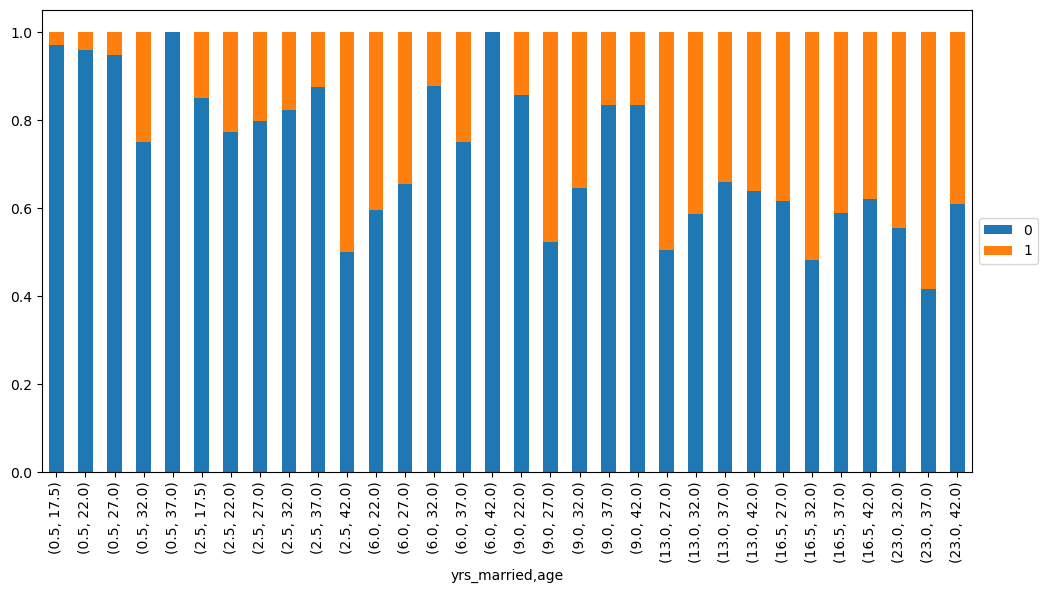

In [146]:
g.plot.bar(stacked=True, rot=90, figsize=(12,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

**Summarize the above results**

* People less than a year into their married life cheat less 
* The longer people are in their married life, the higher the cheating tendency 

## All numerical, independent (X) variables at once

In [147]:
g = df.groupby('affairs').mean()
g

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affairs,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


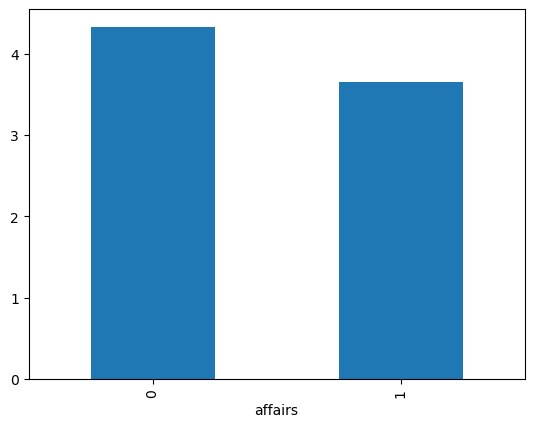

In [148]:
# plotting average rate_marriage for two groups
g['rate_marriage'].plot.bar();

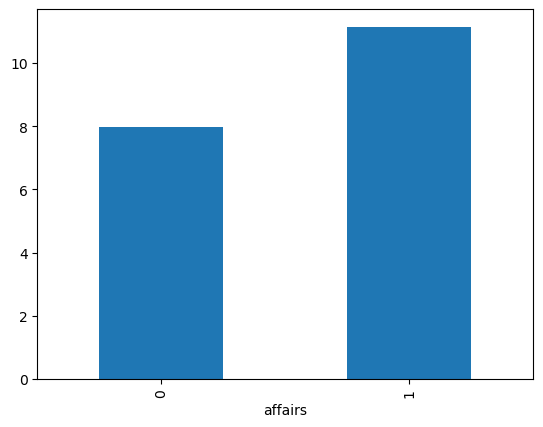

In [149]:
# plotting average yrs_married for two groups
g['yrs_married'].plot.bar();

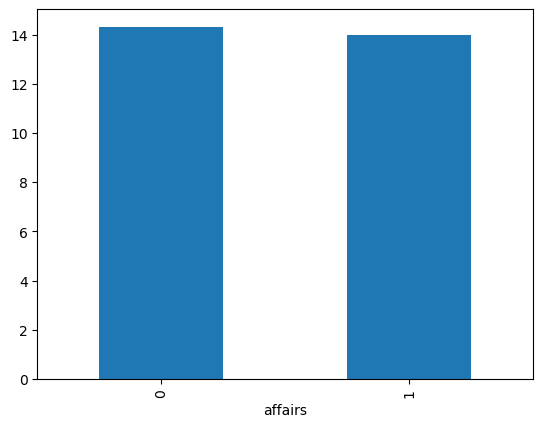

In [150]:
# plotting average educ for two groups
g['educ'].plot.bar();

# Storytelling 

Complete this section based on the findings. Who is likely cheat on spouse? Summarize all the results from this project.

*  Couples who cheated rated their married life lower (3.5) cheated more than people who rated their married life higher (4.5)
* Couples who cheated were 10.5 into their married life on average; couples who did not cheat were 8 years into their married life on average
* Both couples who cheated and did not cheat had college level education on average

